<a href="https://colab.research.google.com/github/duynhat29/data-visualization-/blob/main/ing2025_21km.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ing25.xlsx to ing25.xlsx


In [2]:
import pandas as pd

df = pd.read_excel('ing25.xlsx')
print(df.head())

  Place   Bib               Name  NAT               Club/Company  \
0     1  5995     BENJAMIN POLIN  FRA                        NaN   
1     2  6994         SIMON BONG  GER  LT Haspa Marathon Hamburg   
2     3  6492          JOAO CRUZ  POR                     Amazon   
3     4  6927       THOMAS IARIA  FRA             ENCEVO Loisirs   
4     5  5986  SÉBASTIEN LAURIER  FRA                PHAR LONGWY   

               Group  M/W.Pl   AG. Pl. Gross time  Net time    GAP  
0                NaN  M (1.)  M30 (1.)   01:06:01  01:05:56      -  
1                NaN  M (2.)  M20 (1.)   01:09:57  01:09:52  +3:56  
2  Amazon EU S.à.r.l  M (3.)  M30 (2.)   01:13:12  01:13:08  +7:12  
3     ENCEVO Loisirs  M (4.)  M35 (1.)   01:13:32  01:13:28  +7:32  
4     ING Guest 2025  M (5.)  M40 (1.)   01:13:37  01:13:33  +7:37  


In [3]:
df['Gender'] = df['M/W.Pl'].str[0]  # 'M' or 'W'
print(df['Gender'].value_counts())

Gender
M    5729
W    2914
Name: count, dtype: int64


In [6]:
import pandas as pd

dns = df[df['Net time'].str.upper() == 'DNS']
dnf = df[df['Net time'].str.upper() == 'DNF']

print(f"Number of DNS (Did Not Start): {len(dns)}")
print(f"Number of DNF (Did Not Finish): {len(dnf)}")

Number of DNS (Did Not Start): 10
Number of DNF (Did Not Finish): 146


In [9]:
gender_counts = df['Gender'].value_counts()
print("Gender distribution:")
print(gender_counts)



Gender distribution:
Gender
M    5729
W    2914
Name: count, dtype: int64


In [10]:
dns = df[df['Net time'].str.upper() == 'DNS']
dnf = df[df['Net time'].str.upper() == 'DNF']
print(f"DNS (Did Not Start): {len(dns)}")
print(f"DNF (Did Not Finish): {len(dnf)}")


DNS (Did Not Start): 10
DNF (Did Not Finish): 146


In [14]:
nat_counts_sorted = df['NAT'].value_counts().sort_index()
print(nat_counts_sorted)


NAT
ALB     8
ALG     4
ARG     7
ARM     2
AUS    12
       ..
USA    57
VEN    10
VIE     3
XKX     2
ZIM     1
Name: count, Length: 103, dtype: int64


In [15]:
import pandas as pd

# Clean and normalize 'Nettime' column
df['Nettime_clean'] = df['Net time'].astype(str).str.upper().fillna('')

# Keep only Finished and DNF (exclude DNS and blanks)
filtered_df = df[~df['Nettime_clean'].isin(['DNS', '', '-', 'NAN'])]

# Count by nationality
runners_by_nat = filtered_df['NAT'].value_counts().sort_values(ascending=False)

# Display the result
print(runners_by_nat)



NAT
LUX    2611
FRA    2150
GER    1024
BEL     773
ITA     321
       ... 
ZIM       1
MKD       1
KEN       1
SYR       1
CRC       1
Name: count, Length: 103, dtype: int64


In [16]:
import pandas as pd

# Step 1: Your data (IOC codes and counts)
runners_by_nat = pd.Series({
    'LUX': 2611, 'FRA': 2150, 'GER': 1024, 'BEL': 773, 'ITA': 321, 'ESP': 245,
    'POR': 197, 'GBR': 128, 'NED': 115, 'IRL': 101, 'POL': 68, 'USA': 57,
    'IND': 49, 'CHN': 48, 'BRA': 44, 'GRE': 41, 'ROU': 38, 'SUI': 37,
    'RSA': 29, 'FIN': 29, 'DEN': 28, 'MEX': 28, 'HUN': 25, 'AUT': 22,
    'RUS': 22, 'MAR': 19, 'SVK': 18, 'UKR': 17, 'BUL': 17, 'SWE': 17,
    'COL': 16, 'CZE': 16, 'NOR': 15, 'PHI': 15, 'LTU': 13, 'CAN': 12,
    'AUS': 12, 'TUR': 12, 'CRO': 11, 'MRI': 10, 'VEN': 10, 'LBN': 9,
    'ALB': 8, 'JPN': 8, 'SLO': 8, 'MDA': 7, 'ARG': 7, 'PER': 6,
    'LAT': 5, 'ISL': 5, 'MNE': 5, 'ECU': 5, 'CMR': 5, 'CHI': 4,
    'TPE': 4, 'IRI': 4, 'HKG': 4, 'ALG': 4, 'SDN': 3, 'PAK': 3,
    'INA': 3, 'VIE': 3, 'MLT': 3, 'MAS': 3, 'TUN': 3, 'NGR': 3,
    'GEO': 3, 'ERI': 2, 'KAZ': 2, 'PAN': 2, 'BIH': 2, 'AZE': 2,
    'CIV': 2, 'SGP': 2, 'SRB': 2, 'XKX': 2, 'EST': 2, 'ARM': 2,
    'CUB': 1, 'JOR': 1, 'KOR': 1, 'BLR': 1, 'CGO': 1, 'PAR': 1,
    'BHU': 1, 'SEN': 1, 'BIZ': 1, 'JAM': 1, 'MGL': 1, 'DOM': 1,
    'CYP': 1, 'TOG': 1, 'URU': 1, 'EGY': 1, 'GUI': 1, 'RWA': 1,
    'GUA': 1, 'HON': 1, 'ZIM': 1, 'MKD': 1, 'KEN': 1, 'SYR': 1, 'CRC': 1
}, name='Count')

# Step 2: IOC to full country name (partial mapping shown — extend as needed)
ioc_to_name = {
    'LUX': 'Luxembourg', 'FRA': 'France', 'GER': 'Germany', 'BEL': 'Belgium', 'ITA': 'Italy',
    'ESP': 'Spain', 'POR': 'Portugal', 'GBR': 'United Kingdom', 'NED': 'Netherlands', 'IRL': 'Ireland',
    'POL': 'Poland', 'USA': 'United States', 'IND': 'India', 'CHN': 'China', 'BRA': 'Brazil',
    'GRE': 'Greece', 'ROU': 'Romania', 'SUI': 'Switzerland', 'RSA': 'South Africa', 'FIN': 'Finland',
    'DEN': 'Denmark', 'MEX': 'Mexico', 'HUN': 'Hungary', 'AUT': 'Austria', 'RUS': 'Russia',
    'MAR': 'Morocco', 'SVK': 'Slovakia', 'UKR': 'Ukraine', 'BUL': 'Bulgaria', 'SWE': 'Sweden',
    'COL': 'Colombia', 'CZE': 'Czech Republic', 'NOR': 'Norway', 'PHI': 'Philippines', 'LTU': 'Lithuania',
    'CAN': 'Canada', 'AUS': 'Australia', 'TUR': 'Turkey', 'CRO': 'Croatia', 'MRI': 'Mauritius',
    'VEN': 'Venezuela', 'LBN': 'Lebanon', 'ALB': 'Albania', 'JPN': 'Japan', 'SLO': 'Slovenia',
    'MDA': 'Moldova', 'ARG': 'Argentina', 'PER': 'Peru', 'LAT': 'Latvia', 'ISL': 'Iceland',
    'MNE': 'Montenegro', 'ECU': 'Ecuador', 'CMR': 'Cameroon', 'CHI': 'Chile', 'TPE': 'Chinese Taipei',
    'IRI': 'Iran', 'HKG': 'Hong Kong', 'ALG': 'Algeria', 'SDN': 'Sudan', 'PAK': 'Pakistan',
    'INA': 'Indonesia', 'VIE': 'Vietnam', 'MLT': 'Malta', 'MAS': 'Malaysia', 'TUN': 'Tunisia',
    'NGR': 'Nigeria', 'GEO': 'Georgia', 'ERI': 'Eritrea', 'KAZ': 'Kazakhstan', 'PAN': 'Panama',
    'BIH': 'Bosnia and Herzegovina', 'AZE': 'Azerbaijan', 'CIV': 'Ivory Coast', 'SGP': 'Singapore',
    'SRB': 'Serbia', 'XKX': 'Kosovo', 'EST': 'Estonia', 'ARM': 'Armenia', 'CUB': 'Cuba',
    'JOR': 'Jordan', 'KOR': 'South Korea', 'BLR': 'Belarus', 'CGO': 'Congo', 'PAR': 'Paraguay',
    'BHU': 'Bhutan', 'SEN': 'Senegal', 'BIZ': 'Belize', 'JAM': 'Jamaica', 'MGL': 'Mongolia',
    'DOM': 'Dominican Republic', 'CYP': 'Cyprus', 'TOG': 'Togo', 'URU': 'Uruguay', 'EGY': 'Egypt',
    'GUI': 'Guinea', 'RWA': 'Rwanda', 'GUA': 'Guatemala', 'HON': 'Honduras', 'ZIM': 'Zimbabwe',
    'MKD': 'North Macedonia', 'KEN': 'Kenya', 'SYR': 'Syria', 'CRC': 'Costa Rica'
}

# Step 3: Convert to DataFrame and map country names
df = runners_by_nat.reset_index()
df.columns = ['IOC', 'Count']
df['Country'] = df['IOC'].map(ioc_to_name)

# Step 4: Reorder and display
df = df[['Country', 'IOC', 'Count']].sort_values('Count', ascending=False)
pd.set_option('display.max_rows', None)  # Show all rows
print(df)

                    Country  IOC  Count
0                Luxembourg  LUX   2611
1                    France  FRA   2150
2                   Germany  GER   1024
3                   Belgium  BEL    773
4                     Italy  ITA    321
5                     Spain  ESP    245
6                  Portugal  POR    197
7            United Kingdom  GBR    128
8               Netherlands  NED    115
9                   Ireland  IRL    101
10                   Poland  POL     68
11            United States  USA     57
12                    India  IND     49
13                    China  CHN     48
14                   Brazil  BRA     44
15                   Greece  GRE     41
16                  Romania  ROU     38
17              Switzerland  SUI     37
18             South Africa  RSA     29
19                  Finland  FIN     29
20                  Denmark  DEN     28
21                   Mexico  MEX     28
22                  Hungary  HUN     25
23                  Austria  AUT     22


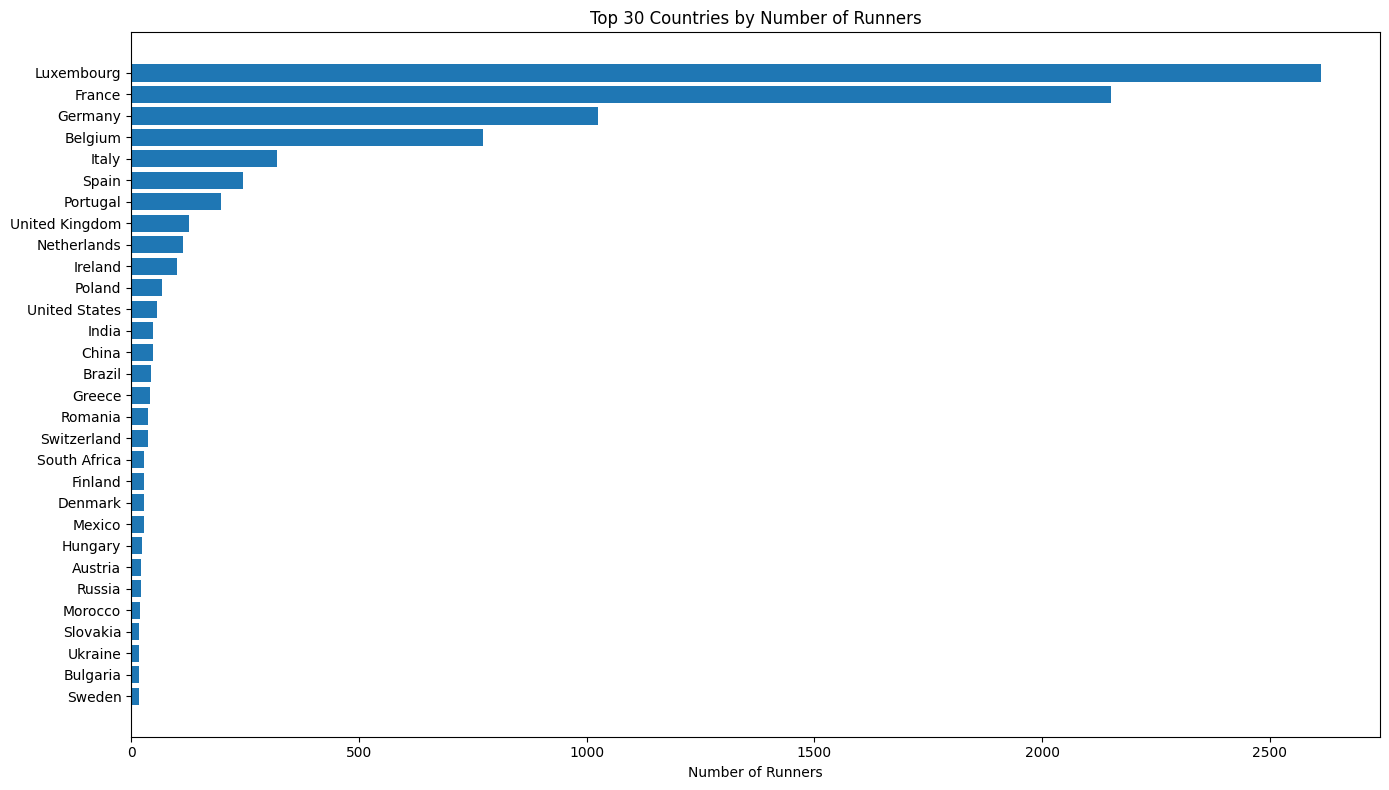

In [17]:
import matplotlib.pyplot as plt

# Recreate and confirm df
df = runners_by_nat.reset_index()
df.columns = ['IOC', 'Count']
df['Country'] = df['IOC'].map(ioc_to_name)
df = df[['Country', 'IOC', 'Count']]

# Sort and select top 30
df_top = df.sort_values('Count', ascending=False).head(30)

# Plot horizontal bar chart
plt.figure(figsize=(14, 8))
plt.barh(df_top['Country'], df_top['Count'])
plt.xlabel('Number of Runners')
plt.title('Top 30 Countries by Number of Runners')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from datetime import time, timedelta

# Step 1: Load the Excel file and check the columns
df = pd.read_excel("ing25.xlsx")
print(df.columns.tolist())  # Run this to see the exact column name

# Step 2: Identify the correct Nettime column name
# Replace 'Nettime' below with the exact name if different
nettime_col = 'Net time'  # <-- change this based on output of the line above

# Step 3: Convert to timedelta (handle datetime.time format)
def convert_to_timedelta(val):
    if isinstance(val, time):
        return timedelta(hours=val.hour, minutes=val.minute, seconds=val.second)
    return pd.NaT

df['Nettime_clean'] = df[nettime_col].apply(convert_to_timedelta)

# Step 4: Drop DNS/DNF rows
df_valid = df[df['Nettime_clean'].notna()].copy()

# Step 5: Group into 5-minute intervals
def round_up_to_5_min(td):
    total_minutes = td.total_seconds() / 60
    rounded_minutes = int((total_minutes + 4) // 5 * 5)
    hours = rounded_minutes // 60
    minutes = rounded_minutes % 60
    return f"{hours}:{minutes:02d}"

df_valid['Performance Group'] = df_valid['Nettime_clean'].apply(round_up_to_5_min)

# Step 6: Count runners in each group
performance_df = df_valid['Performance Group'].value_counts().sort_index().reset_index()
performance_df.columns = ['Performance Group (hh:mm)', 'Number of Runners']

# Show result
print(performance_df)


['Place', 'Bib', 'Name', 'NAT', 'Club/Company', 'Group', 'M/W.Pl', 'AG. Pl.', 'Gross time', 'Net time', 'GAP']
   Performance Group (hh:mm)  Number of Runners
0                       1:05                  1
1                       1:10                  1
2                       1:15                  8
3                       1:20                 26
4                       1:25                 67
5                       1:30                105
6                       1:35                166
7                       1:40                309
8                       1:45                404
9                       1:50                540
10                      1:55                609
11                      2:00                785
12                      2:05                710
13                      2:10                738
14                      2:15                716
15                      2:20                682
16                      2:25                611
17                      2

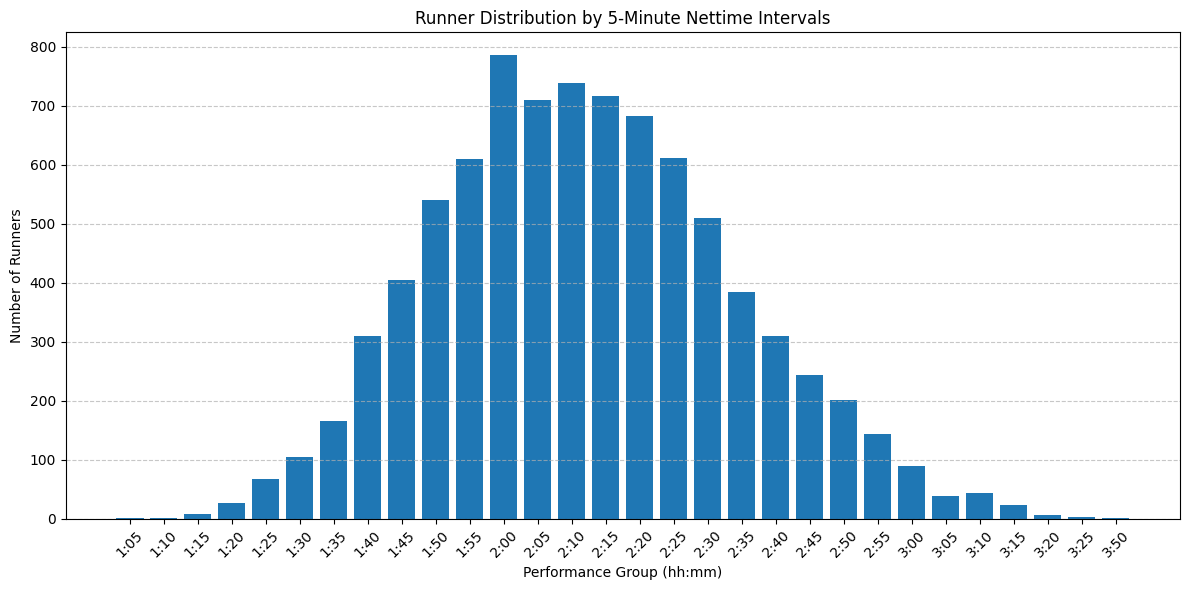

In [20]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Performance Group (hh:mm)'], performance_df['Number of Runners'])
plt.xlabel('Performance Group (hh:mm)')
plt.ylabel('Number of Runners')
plt.title('Runner Distribution by 5-Minute Nettime Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
from datetime import timedelta, time

# Step 1: Load the Excel file
df = pd.read_excel("ing25.xlsx")

# Step 2: Convert Nettime (datetime.time) to timedelta
def convert_to_timedelta(val):
    if isinstance(val, time):
        return timedelta(hours=val.hour, minutes=val.minute, seconds=val.second)
    return pd.NaT

df['Nettime_clean'] = df['Net time'].apply(convert_to_timedelta)

# Step 3: Filter rows with valid Nettime
df_valid = df[df['Nettime_clean'].notna()].copy()

# Step 4: Extract gender from 'M/W.Pl' column
df_valid['Gender'] = df_valid['M/W.Pl'].astype(str).str[0]  # Should be 'M' or 'W'

# Step 5: Sort by best Nettime (ascending)
df_sorted = df_valid.sort_values('Nettime_clean')

# Step 6: Get top 20 for each gender
top_women = df_sorted[df_sorted['Gender'] == 'W'][['Name', 'NAT', 'Nettime_clean']].head(20)
top_men = df_sorted[df_sorted['Gender'] == 'M'][['Name', 'NAT', 'Nettime_clean']].head(20)

# Step 7: Print the results
print("🏃‍♀️ Top 20 Best Performing Women:")
print(top_women)

print("\n🏃‍♂️ Top 20 Best Performing Men:")
print(top_men)


🏃‍♀️ Top 20 Best Performing Women:
                     Name  NAT   Nettime_clean
43           TERESA FRANK  GER 0 days 01:21:50
56         MICHELLE TRUMM  GER 0 days 01:22:53
77          TINE HAUSMANN  GER 0 days 01:24:16
83        TRACEY ATKINSON  GBR 0 days 01:24:59
90          YASMINE PAGNI  FRA 0 days 01:25:29
99            ANNE REISER  LUX 0 days 01:25:50
118  ANASTASIIA LISTOVSKA  UKR 0 days 01:26:46
121   CAMILLE BUCCIARELLI  FRA 0 days 01:27:06
151      RUNA EGILSDOTTIR  LUX 0 days 01:28:26
172         EVA ZASTAWNIK  LUX 0 days 01:29:14
179    ANNE-CLAIRE DECKER  LUX 0 days 01:29:37
182     CÉLINE TARRILLION  FRA 0 days 01:29:55
187          YVONNE ENGEL  GER 0 days 01:30:09
221      STEPHANIE PELLER  LUX 0 days 01:31:37
228          JEANNE SPIRK  FRA 0 days 01:31:57
279        MARINE QUINIOU  FRA 0 days 01:33:26
280    ANN-CATHRINE JÜLCH  GER 0 days 01:33:33
285        KERSTIN HEINEN  BEL 0 days 01:33:41
310     KRISTINA MIKULOVA  SVK 0 days 01:34:25
335             LISA RATZ

In [26]:

# Step 3: Filter only valid net times and non-empty company names
df_valid = df[df['Nettime_clean'].notna()].copy()
df_company = df_valid[df_valid['Club/Company'].notna()].copy()

# Step 4: Normalize company names
def normalize_company_name(name):
    name = str(name).strip().upper()
    name = unicodedata.normalize('NFKD', name)
    name = ''.join(c for c in name if not unicodedata.combining(c))  # Remove accents
    name = name.replace('-', ' ').replace('  ', ' ')
    return name

df_company['Company_Normalized'] = df_company['Club/Company'].apply(normalize_company_name)

# Step 5: Group by normalized company name
company_stats = df_company.groupby('Company_Normalized').agg(
    Runners=('Name', 'count'),
).reset_index()


# Step 7: Sort by team size
company_stats = company_stats.sort_values(by='Runners', ascending=False)

# Step 8: Print result
print(company_stats.head(30))  # Show top 30 companies


                          Company_Normalized  Runners
678                           PWC LUXEMBOURG      100
39                                    AMAZON       95
181                                    CGDIS       56
443                                     KPMG       53
910                      VILLE DE LUXEMBOURG       45
457                            LA PROVENCALE       44
56                                    ARENDT       38
240                                 DELOITTE       35
798                             STATE STREET       22
460                           LAFCLUB POLICE       22
703                         REVANTAGE EUROPE       21
649                            PAUL WURTH SA       18
792                               SPUERKEESS       16
474                          LAUF MIT MARKUS       16
185                    CHARLES KIEFFER GROUP       15
179                          CERATIZIT GROUP       15
55                                ARCUS ASBL       14
567                   LUXCAR

In [24]:
import unicodedata


In [28]:
import pandas as pd

# 1. Exclude DNS, DNF and ensure all values are strings
finished = df[~df['Net time'].str.upper().isin(['DNS', 'DNF'])].copy()
finished['Net time'] = finished['Net time'].astype(str).str.strip()

# 2. Identify rows that can't be converted
def is_valid_time_format(t):
    try:
        pd.to_timedelta(t)
        return True
    except:
        return False

finished['ValidTime'] = finished['Net time'].apply(is_valid_time_format)

# 3. Filter only valid times
valid_times = finished[finished['ValidTime']].copy()

# 4. Convert valid 'Net time' to seconds
valid_times['Net time (seconds)'] = pd.to_timedelta(valid_times['Net time']).dt.total_seconds()



In [36]:
# Convert the cutoff values (in seconds) back to hh:mm:ss
q25_time = pd.to_timedelta(q25, unit='s')
q50_time = pd.to_timedelta(q50, unit='s')
q75_time = pd.to_timedelta(q75, unit='s')

# Print the time thresholds for each quartile
print("⏱️ Net Time Thresholds for Quartiles:")
print(f"Top 25%: ≤ {q25_time}")
print(f"Top 50%: ≤ {q50_time}")
print(f"Top 75%: ≤ {q75_time}")
print(f"Bottom 25%: > {q75_time}")






⏱️ Net Time Thresholds for Quartiles:
Top 25%: ≤ 0 days 01:55:08
Top 50%: ≤ 0 days 02:09:15
Top 75%: ≤ 0 days 02:24:48
Bottom 25%: > 0 days 02:24:48


In [38]:
# Basic descriptive stats in seconds
mean_sec = valid_times['Net time (seconds)'].mean()
median_sec = valid_times['Net time (seconds)'].median()
min_sec = valid_times['Net time (seconds)'].min()
max_sec = valid_times['Net time (seconds)'].max()
std_sec = valid_times['Net time (seconds)'].std()

# Convert all to hh:mm:ss for readability
mean_time = pd.to_timedelta(mean_sec, unit='s')
median_time = pd.to_timedelta(median_sec, unit='s')
min_time = pd.to_timedelta(min_sec, unit='s')
max_time = pd.to_timedelta(max_sec, unit='s')
std_time = pd.to_timedelta(std_sec, unit='s')

# Print results
print("📊 Net Time Statistics:")
print(f"Mean - average:   {mean_time} ({mean_sec:.2f} seconds)")
print(f"Median 50%: {median_time} ({median_sec:.2f} seconds)")
print(f"Fastest:    {min_time} ({min_sec:.2f} seconds)")
print(f"Slowest:    {max_time} ({max_sec:.2f} seconds)")
print(f"Standard deviation:    {std_time} ({std_sec:.2f} seconds)")


📊 Net Time Statistics:
Mean - average:   0 days 02:10:33.964972284 (7833.96 seconds)
Median 50%: 0 days 02:09:15 (7755.00 seconds)
Fastest:    0 days 01:05:56 (3956.00 seconds)
Slowest:    0 days 03:46:16 (13576.00 seconds)
Standard deviation:    0 days 00:21:50.970156754 (1310.97 seconds)


📊 Runners by Age Range:
20.0–29.0: 2444 runners
30.0–39.0: 1662 runners
35.0–44.0: 1264 runners
40.0–49.0: 998 runners
45.0–54.0: 773 runners
50.0–59.0: 590 runners
55.0–64.0: 370 runners
60.0–69.0: 162 runners
65.0–74.0: 74 runners
70.0–79.0: 23 runners
75.0–84.0: 2 runners
80.0–89.0: 1 runners
90.0–99.0: 1 runners


<ipython-input-44-011d2e5299cf>:38: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


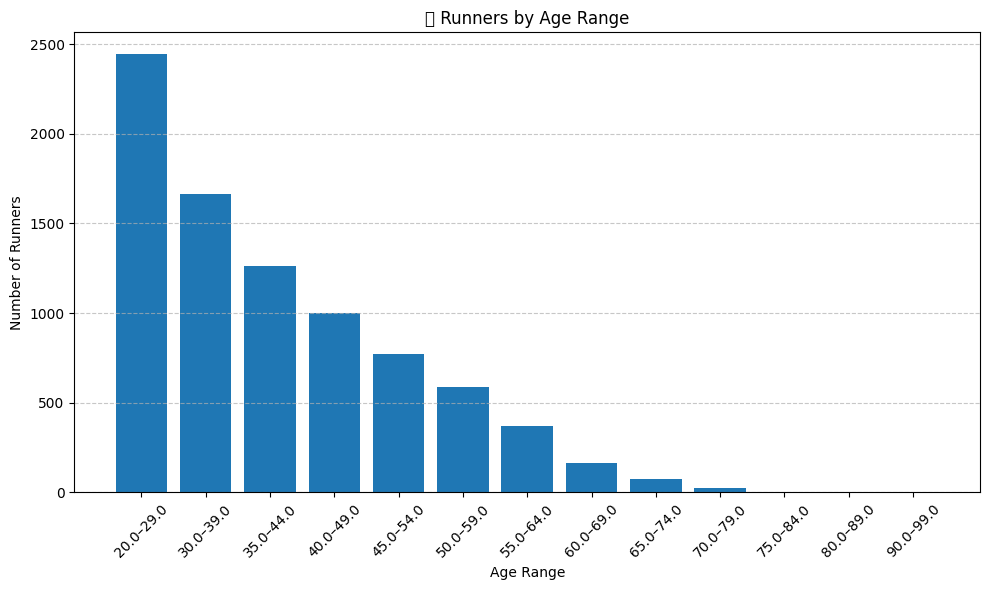

In [44]:

import re

# Extract age group like 'M30' or 'W40' from 'AG. Pl.' column
def extract_age_group(ag):
    if isinstance(ag, str):
        match = re.match(r'[MW](\d+)', ag)
        if match:
            return int(match.group(1))
    return None

# Apply to get clean age group as integer
valid_times['Age Group'] = valid_times['AG. Pl.'].apply(extract_age_group)

# Drop rows where age group couldn't be extracted
valid_age_groups = valid_times.dropna(subset=['Age Group'])

# Count number of runners by age group (e.g., 20, 30, 40)
age_group_counts = valid_age_groups['Age Group'].value_counts().sort_index()

# Display summary
print("📊 Runners by Age Range:")
for age, count in age_group_counts.items():
    print(f"{age}–{age+9}: {count} runners")
import matplotlib.pyplot as plt

# Set up age range labels like "20–29"
age_range_labels = [f"{age}–{age+9}" for age in age_group_counts.index]
counts = age_group_counts.values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_range_labels, counts)
plt.title('🏃 Runners by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Runners')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [43]:
# Locate runner(s) with AG. Pl. starting with 'M90'
m90_runner = valid_times[valid_times['AG. Pl.'].str.startswith('M90', na=False)]

# Display key info
print(m90_runner[['Name', 'Bib', 'NAT', 'Club/Company', 'AG. Pl.', 'Net time']])



            Name    Bib  NAT     Club/Company   AG. Pl.  Net time
8401  JOSY SIMON  13852  LUX  LG St. Wolfgang  M90 (1.)  03:05:51


In [45]:
!jupyter nbconvert --to pdf --no-input your_notebook.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 